
1.   Karan Patel 100812891
1.   Munjal Patel 100810810
2.   Yash Shah 100812896



# Data preprocessing

In [ ]:
#loading libraries
import pandas as pd
import numpy as np
import seaborn as sb
import missingno as msno
import matplotlib.pyplot as plt
data = pd .read_csv("dataset_agri_1_final.csv") #load the dataset
data.head()                                     #Top five rows will be printed from dataset to understand it

,STATE,SOWNING SEASON,TEMP(°C),SOIL TYPE,CROP'S WATER NEED(mm),COST OF PRODUCTION(Rs/Qtl),YIELD(Qtl/ha),CROP TYPE
0,MP,WINTER,20,LOAM,900,400,40.0,DRY CHILLI
1,MP,WINTER,20,CLAY,850,450,42.0,DRY CHILLI
2,MP,SPRING,25,LOAM,910,500,43.0,DRY CHILLI
3,MP,SPRING,25,SANDY,1000,490,45.0,DRY CHILLI
4,UP,WINTER,22,LOAM,860,590,39.0,DRY CHILLI


In [ ]:
data.describe()

,TEMP(°C),CROP'S WATER NEED(mm),COST OF PRODUCTION(Rs/Qtl),YIELD(Qtl/ha)
count,99.000000,99.000000,99.000000,99.000000
mean,24.545455,836.484848,2380.353535,132.351515
std,5.297810,506.864297,1870.715002,287.989007
min,9.000000,300.000000,220.000000,4.000000
25%,22.000000,515.000000,995.000000,23.000000
50%,25.000000,601.000000,1470.000000,29.000000
75%,29.000000,1015.000000,4605.000000,63.500000
max,35.000000,2500.000000,5420.000000,1060.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   STATE                       99 non-null     object 
 1   SOWNING SEASON              99 non-null     object 
 2   TEMP(°C)                    99 non-null     int64  
 3   SOIL  TYPE                  99 non-null     object 
 4   CROP'S WATER NEED(mm)       99 non-null     int64  
 5   COST OF PRODUCTION(Rs/Qtl)  99 non-null     int64  
 6   YIELD(Qtl/ha)               99 non-null     float64
 7   CROP TYPE                   99 non-null     object 
dtypes: float64(1), int64(3), object(4)
memory usage: 6.3+ KB


In [ ]:
data.nunique()                # This will give how many unique values are there in every column
#data['SOIL  TYPE'].unique()

STATE                          4
SOWNING SEASON                 6
TEMP(°C)                      25
SOIL  TYPE                     4
CROP'S WATER NEED(mm)         74
COST OF PRODUCTION(Rs/Qtl)    90
YIELD(Qtl/ha)                 58
CROP TYPE                     10
dtype: int64

In [ ]:
data.isnull().sum()       # This will check for null values in dataset

# The dataset is created manualy so there is not any null values are there.

STATE                         0
SOWNING SEASON                0
TEMP(°C)                      0
SOIL  TYPE                    0
CROP'S WATER NEED(mm)         0
COST OF PRODUCTION(Rs/Qtl)    0
YIELD(Qtl/ha)                 0
CROP TYPE                     0
dtype: int64

In [ ]:
print("No. of duplicate entries: ",len(data[data.duplicated()]))
print(data)

No. of duplicate entries:  0
   STATE SOWNING SEASON  ...  YIELD(Qtl/ha)   CROP TYPE
0     MP         WINTER  ...           40.0  DRY CHILLI
1     MP         WINTER  ...           42.0  DRY CHILLI
2     MP         SPRING  ...           43.0  DRY CHILLI
3     MP         SPRING  ...           45.0  DRY CHILLI
4     UP         WINTER  ...           39.0  DRY CHILLI
..   ...            ...  ...            ...         ...
94    MP        MONSOON  ...           53.0        RICE
95    MP         SUMMER  ...           58.0        RICE
96    GJ        MONSOON  ...           52.0        RICE
97    GJ        MONSOON  ...           55.0        RICE
98    RJ        MONSOON  ...           59.0        RICE

[99 rows x 8 columns]


# EDA: Exploratory Data Analysis

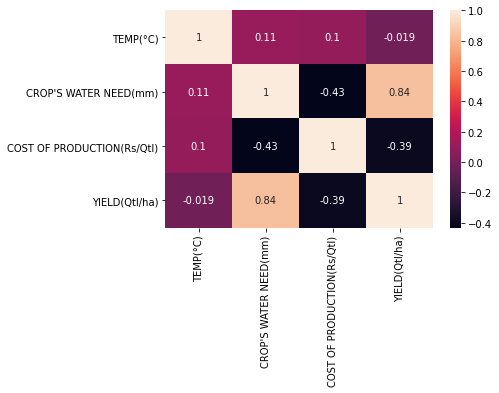

In [ ]:
# This is the correlation matrix which tells relations between different features in the dataset.
corela = data.corr()
sb.heatmap(corela, xticklabels = corela.columns , yticklabels = corela.columns , annot = True)

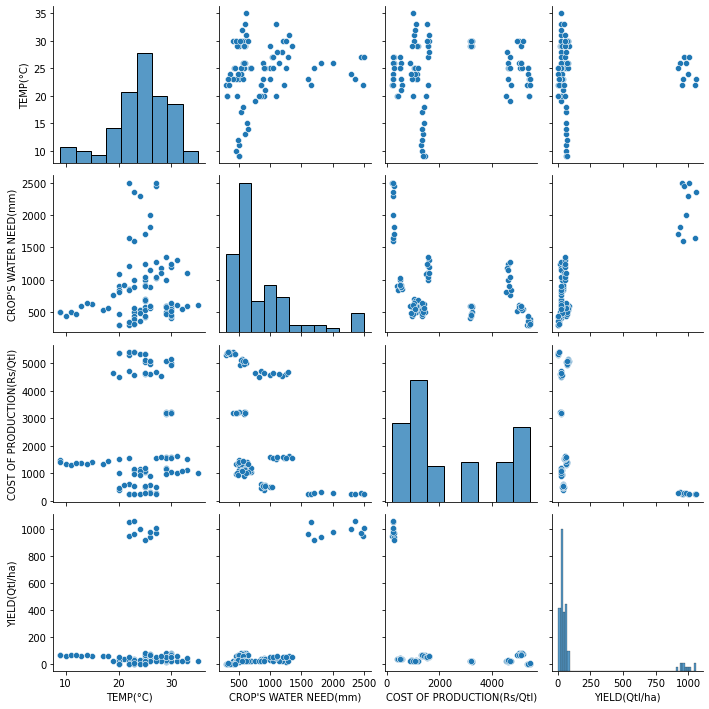

In [ ]:
#This is pairplot of every two features
sb.pairplot(data)

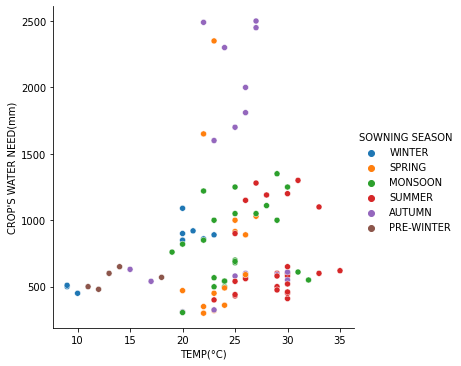

In [ ]:
# This is relation plot between temperature and crop's water need in different season
sb.relplot( x = 'TEMP(°C)', y = 'CROP\'S WATER NEED(mm)' , hue = 'SOWNING SEASON', data = data)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


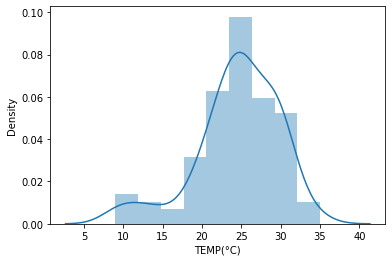

In [ ]:
#Histogram of temperature
sb.distplot(data['TEMP(°C)'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


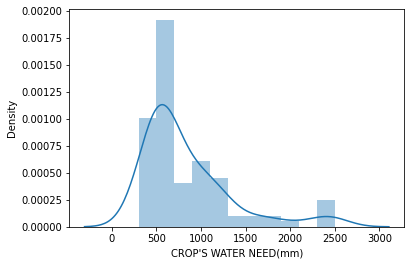

In [ ]:
#Histogram of crop's water need
sb.distplot(data["CROP'S WATER NEED(mm)"])

In [ ]:
data.groupby("CROP TYPE")["YIELD(Qtl/ha)"].sum().sort_values(ascending = False)
data.groupby("CROP TYPE")["TEMP(°C)"].max().sort_values(ascending = False)
data.groupby(["SOWNING SEASON", "CROP TYPE"])["YIELD(Qtl/ha)"].max()

SOWNING SEASON  CROP TYPE 
AUTUMN          GARLIC          85.0
                GREENGRAM        5.3
                SUGARCANE     1010.0
                WHEAT           64.0
MONSOON         COTTON          28.0
                GREENGRAM        4.9
                MILLET          26.0
                RICE            59.0
                SOYABEAN        28.0
PRE-WINTER      WHEAT           69.0
SPRING          DRY CHILLI      45.0
                GREENGRAM        5.2
                MILLET          29.0
                SUGARCANE     1060.0
SUMMER          COTTON          26.0
                GARLIC          80.0
                GREENGRAM        5.1
                GROUNDNUT       27.0
                MILLET          28.0
                RICE            58.0
                SOYABEAN        26.0
WINTER          DRY CHILLI      42.0
                RICE            54.0
                WHEAT           67.0
Name: YIELD(Qtl/ha), dtype: float64

In [ ]:
data.groupby("CROP TYPE")["CROP'S WATER NEED(mm)"].max().sort_values(ascending = False)

import plotly.express as px

fig = px.bar(data, x = "STATE", y = "YIELD(Qtl/ha)", color='SOWNING SEASON', title = "Statewise Seasonal Total Yield")
fig.show()

In [ ]:
fig = px.bar(data, x = "CROP TYPE", y = "TEMP(°C)", color='SOIL  TYPE', title = "Temprature vs Crop Type and Soil Type")
fig.show()

# We will transfer the string values into integer values using OneHotEncoder

In [ ]:
#X = data.iloc[:,:-1].values
Y = data.iloc[: , -1].values
data1 = data.drop(['CROP TYPE'], axis = 1)
#print(X)
#print(Y)

In [ ]:
#using onehotencoder converting string values into integer
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse=False)
ohe.fit_transform(data[['STATE']])
ohe.fit_transform(data[['SOWNING SEASON']])
ohe.fit_transform(data[['SOIL  TYPE']])
mct = make_column_transformer( (OneHotEncoder() , ['STATE','SOWNING SEASON','SOIL  TYPE']), remainder = 'passthrough')
X = mct.fit_transform(data1)
#print(data1)
print(X)

[[0.000e+00 1.000e+00 0.000e+00 ... 9.000e+02 4.000e+02 4.000e+01]
 [0.000e+00 1.000e+00 0.000e+00 ... 8.500e+02 4.500e+02 4.200e+01]
 [0.000e+00 1.000e+00 0.000e+00 ... 9.100e+02 5.000e+02 4.300e+01]
 ...
 [1.000e+00 0.000e+00 0.000e+00 ... 1.350e+03 1.555e+03 5.200e+01]
 [1.000e+00 0.000e+00 0.000e+00 ... 1.250e+03 1.540e+03 5.500e+01]
 [0.000e+00 0.000e+00 1.000e+00 ... 1.110e+03 1.590e+03 5.900e+01]]


In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [ ]:
# Using LabelEncoder labeling the target values
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Y = le.fit_transform(Y)
print(Y)

[1 1 1 1 1 1 1 1 1 1 7 7 7 7 7 7 7 7 7 7 8 8 8 8 8 8 8 8 8 8 4 4 4 4 4 4 4
 4 4 4 2 2 2 2 2 2 2 2 2 9 9 9 9 9 9 9 9 9 9 5 5 5 5 5 5 5 5 5 5 0 0 0 0 0
 0 0 0 0 0 3 3 3 3 3 3 3 3 3 3 6 6 6 6 6 6 6 6 6 6]


## Model Approaches

1. KNN: K - Nearest Neighbours

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X, Y)
print(classifier.predict(sc.transform([[0,0,1,0,0,0,0,1,0,0,26,0,0,1,0,2500,250,1010]])))

[8]


2. Support Vector Machine

In [ ]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X, Y)
print(classifier.predict(sc.transform([[0,0,1,0,0,0,0,1,0,0,26,0,0,1,0,2500,250,1010]])))

[8]


3. Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X, Y)
print(classifier.predict(sc.transform([[0,0,1,0,0,0,0,1,0,0,26,0,0,1,0,2500,250,1010]])))

[6]


4. Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X,Y)
print(classifier.predict(sc.transform([[0,0,1,0,0,0,0,1,0,0,26,0,0,1,0,2500,250,1010]])))

[8]


5. Random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X, Y)
print(classifier.predict(sc.transform([[0,0,1,0,0,0,0,1,0,0,26,0,0,1,0,2500,250,1010]])))

[8]


6. Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X,Y)
print(classifier.predict(sc.transform([[0,0,1,0,0,0,0,1,0,0,26,0,0,1,0,2500,250,1010]])))

[4]


7. Stochastic Gradient Decent

In [ ]:
from sklearn.linear_model import SGDClassifier
classifier = SGDClassifier(loss = 'modified_huber', shuffle = True, random_state = 101)
classifier.fit(X,Y)
print(classifier.predict(sc.transform([[0,0,1,0,0,0,0,1,0,0,26,0,0,1,0,2500,250,1010]])))

[6]
